# Delhi House Price Prediction

importing the libraries

In [57]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

Importing the Dataset

In [58]:
df1=pd.read_csv("delhi house price.csv")
df1.head()

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000,"Noida Extension, Noida, Delhi NCR",1350,28.608850,77.460560,3,3,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000,"Sector 79, Gurgaon, Delhi NCR",1490,28.374236,76.952416,3,3,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000,"Vaishali, Ghaziabad, Delhi NCR",2385,28.645769,77.385110,4,5,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050,28.566914,77.436434,2,2,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350,28.520732,77.356491,2,2,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593


In [59]:
df1.shape

(7738, 18)

Firstly,we will drop unwanted columns which are not important in building a model in our data analysis and futher we will drop the columns which are not required for our price prediction.

In [114]:
df2=df1.drop(['Unnamed: 0','latitude','longitude','Balcony','parking','Landmarks','desc','Status','neworold','Lift'],axis='columns')

In [115]:
df2.head()

,price,Address,area,Bedrooms,Bathrooms,Furnished_status,type_of_building,Price_sqft
0,5600000,"Noida Extension, Noida, Delhi NCR",1350,3,3,NaN,Flat,4148.148148
1,8800000,"Sector 79, Gurgaon, Delhi NCR",1490,3,3,Semi-Furnished,Flat,5906.040268
2,16500000,"Vaishali, Ghaziabad, Delhi NCR",2385,4,5,Unfurnished,Flat,6918.238994
3,3810000,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050,2,2,Unfurnished,Flat,3628.571429
4,6200000,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350,2,2,NaN,Flat,4592.592593


# Data Cleaning

In the above dataframe, the Address column containing the state,area,location but we just want only the state so we use split function to split state,area,location. 

In [62]:
df2['City']=df2['Address'].apply(lambda x: x.split(",")[-2])

In [63]:
df2.head()

,price,Address,area,Bedrooms,Bathrooms,Furnished_status,type_of_building,Price_sqft,City
0,5600000,"Noida Extension, Noida, Delhi NCR",1350,3,3,NaN,Flat,4148.148148,Noida
1,8800000,"Sector 79, Gurgaon, Delhi NCR",1490,3,3,Semi-Furnished,Flat,5906.040268,Gurgaon
2,16500000,"Vaishali, Ghaziabad, Delhi NCR",2385,4,5,Unfurnished,Flat,6918.238994,Ghaziabad
3,3810000,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050,2,2,Unfurnished,Flat,3628.571429,Greater Noida
4,6200000,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350,2,2,NaN,Flat,4592.592593,Noida


After splitting the location column, we will drop Address column which is not required for our prediction.

In [64]:
df3=df2.drop(['Address'],axis=1)

In [65]:
df3.head()

,price,area,Bedrooms,Bathrooms,Furnished_status,type_of_building,Price_sqft,City
0,5600000,1350,3,3,NaN,Flat,4148.148148,Noida
1,8800000,1490,3,3,Semi-Furnished,Flat,5906.040268,Gurgaon
2,16500000,2385,4,5,Unfurnished,Flat,6918.238994,Ghaziabad
3,3810000,1050,2,2,Unfurnished,Flat,3628.571429,Greater Noida
4,6200000,1350,2,2,NaN,Flat,4592.592593,Noida


After dropping the Address column,we now check the null values in above dataframe

In [66]:
df3.isnull().sum()

price                  0
area                   0
Bedrooms               0
Bathrooms              0
Furnished_status    3614
type_of_building       0
Price_sqft             0
City                   0
dtype: int64

In [68]:
df4=df3.copy()

The Furnished_status has 3614 null values but the furnished_status is not necessary for our prediction.We have kept the  Furnished_status without dropping the column in the beginning because,in reality in the delhi city mostly the house price depends on various factors,furnished status is also a major factor. 

In [69]:
df4.drop(['Furnished_status'],axis=1,inplace=True)

In [70]:
df4.head(100)

,price,area,Bedrooms,Bathrooms,type_of_building,Price_sqft,City
0,5600000,1350,3,3,Flat,4148.148148,Noida
1,8800000,1490,3,3,Flat,5906.040268,Gurgaon
2,16500000,2385,4,5,Flat,6918.238994,Ghaziabad
3,3810000,1050,2,2,Flat,3628.571429,Greater Noida
4,6200000,1350,2,2,Flat,4592.592593,Noida
...,...,...,...,...,...,...,...
95,82000000,5495,5,6,Flat,14922.656960,Gurgaon
96,9000000,1250,2,2,Individual House,7200.000000,New Delhi - West
97,14000000,2500,3,2,Flat,5600.000000,New Delhi - East
98,8900000,1815,3,3,Flat,4903.581267,Gurgaon


In [71]:
df4.isnull().sum()

price               0
area                0
Bedrooms            0
Bathrooms           0
type_of_building    0
Price_sqft          0
City                0
dtype: int64

In [72]:
df4.type_of_building.unique()

array(['Flat', 'Individual House'], dtype=object)

In [73]:
df4.Price_sqft.unique()

array([4148.148148, 5906.040268, 6918.238994, ..., 7214.611872,
       4254.716981, 3688.092729])

In [74]:
df4.City.unique()

array([' Noida', ' Gurgaon', ' Ghaziabad', ' Greater Noida',
       ' New Delhi - Rohini', ' New Delhi - South', ' New Delhi - Dwarka',
       ' New Delhi - West', ' Faridabad', ' Gurgaon - South',
       ' New Delhi - East', ' New Delhi - North', ' New Delhi',
       ' New Delhi - Central', 'Noida', ' Gurgaon - North',
       'Greater Noida'], dtype=object)

In [75]:
df4.groupby('City')['City'].agg('count').sort_values(ascending=True)

City
 Gurgaon - North           1
Greater Noida              1
Noida                      3
 Gurgaon - South           5
 New Delhi                 7
 New Delhi - Central      12
 New Delhi - North        53
 New Delhi - Rohini       81
 New Delhi - East        182
 New Delhi - Dwarka      188
 New Delhi - South       330
 New Delhi - West        440
 Faridabad               472
 Greater Noida           961
 Noida                  1091
 Gurgaon                1815
 Ghaziabad              2096
Name: City, dtype: int64

In [76]:
df4.City.apply(lambda x:x.strip())

0               Noida
1             Gurgaon
2           Ghaziabad
3       Greater Noida
4               Noida
            ...      
7733        Ghaziabad
7734    Greater Noida
7735        Ghaziabad
7736        Ghaziabad
7737        Ghaziabad
Name: City, Length: 7738, dtype: object

In [77]:
df4.City.unique()

array([' Noida', ' Gurgaon', ' Ghaziabad', ' Greater Noida',
       ' New Delhi - Rohini', ' New Delhi - South', ' New Delhi - Dwarka',
       ' New Delhi - West', ' Faridabad', ' Gurgaon - South',
       ' New Delhi - East', ' New Delhi - North', ' New Delhi',
       ' New Delhi - Central', 'Noida', ' Gurgaon - North',
       'Greater Noida'], dtype=object)

In [78]:
df4.head()

,price,area,Bedrooms,Bathrooms,type_of_building,Price_sqft,City
0,5600000,1350,3,3,Flat,4148.148148,Noida
1,8800000,1490,3,3,Flat,5906.040268,Gurgaon
2,16500000,2385,4,5,Flat,6918.238994,Ghaziabad
3,3810000,1050,2,2,Flat,3628.571429,Greater Noida
4,6200000,1350,2,2,Flat,4592.592593,Noida


In [79]:
df4['Price_sqft'].describe()

count     7738.000000
mean      5543.660241
std       2408.659307
min       2100.000000
25%       3950.986915
50%       4972.674332
75%       6350.638693
max      44378.698220
Name: Price_sqft, dtype: float64

In [80]:
def prper_sqft(df):
    def_out=pd.DataFrame()
    for key,sub_df in df.groupby('City'):
        m=np.mean(sub_df.Price_sqft)
        st=np.std(sub_df.Price_sqft)
        reduced_df=sub_df[(sub_df.Price_sqft>(m-st))&(sub_df.Price_sqft<=(m+st))]
        df_out=pd.concat([def_out,reduced_df],ignore_index=True)
    return df_out
prper_sqft(df4)
    
        
        

,price,area,Bedrooms,Bathrooms,type_of_building,Price_sqft,City
0,5100000,1040,2,2,Flat,4903.846154,Noida
1,5700000,1150,2,2,Flat,4956.521739,Noida


In [81]:
df4.shape

(7738, 7)

# Data visualisation

Text(0, 0.5, 'count')

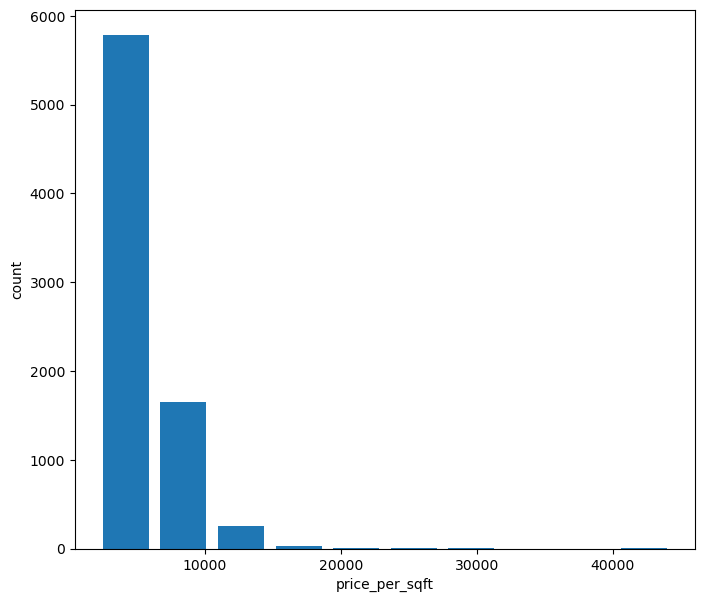

In [82]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(8,7)
plt.hist(df4.Price_sqft,rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('count')

In [83]:
df4[df4.Bathrooms>df4.Bedrooms+2]

,price,area,Bedrooms,Bathrooms,type_of_building,Price_sqft,City
2299,45000000,5000,4,7,Flat,9000.000000,Noida
2805,6300000,1500,5,10,Flat,4200.000000,Gurgaon
2853,47500000,4500,5,8,Individual House,10555.555560,Gurgaon
2902,35000000,5200,5,9,Individual House,6730.769231,Greater Noida
3101,14000000,2370,4,7,Flat,5907.172996,Ghaziabad
4599,40000000,6000,5,8,Flat,6666.666667,Gurgaon
7055,18000000,2400,3,6,Individual House,7500.000000,Gurgaon


In [84]:
df4.shape

(7738, 7)

In [85]:
df5=df4.drop('Price_sqft',axis=1)

In [86]:
df5.head()

,price,area,Bedrooms,Bathrooms,type_of_building,City
0,5600000,1350,3,3,Flat,Noida
1,8800000,1490,3,3,Flat,Gurgaon
2,16500000,2385,4,5,Flat,Ghaziabad
3,3810000,1050,2,2,Flat,Greater Noida
4,6200000,1350,2,2,Flat,Noida


# Data Preprocessing

# Encoding the Data

Encoding the City column

In [87]:
dummies=pd.get_dummies(df5.City,dtype='int')

In [88]:
dummies

,Faridabad,Ghaziabad,Greater Noida,Gurgaon,Gurgaon - North,Gurgaon - South,New Delhi,New Delhi - Central,New Delhi - Dwarka,New Delhi - East,New Delhi - North,New Delhi - Rohini,New Delhi - South,New Delhi - West,Noida,Greater Noida,Noida
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7733,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7734,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7735,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7736,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
df6=pd.concat([df5,dummies.drop('Noida',axis='columns')],axis=1)

In [90]:
df6.head()

,price,area,Bedrooms,Bathrooms,type_of_building,City,Faridabad,Ghaziabad,Greater Noida,Gurgaon,...,New Delhi,New Delhi - Central,New Delhi - Dwarka,New Delhi - East,New Delhi - North,New Delhi - Rohini,New Delhi - South,New Delhi - West,Noida,Greater Noida
0,5600000,1350,3,3,Flat,Noida,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,8800000,1490,3,3,Flat,Gurgaon,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,16500000,2385,4,5,Flat,Ghaziabad,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3810000,1050,2,2,Flat,Greater Noida,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,6200000,1350,2,2,Flat,Noida,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [91]:
df7=df6.drop('City',axis=1)

In [92]:
df7.head()

,price,area,Bedrooms,Bathrooms,type_of_building,Faridabad,Ghaziabad,Greater Noida,Gurgaon,Gurgaon - North,...,New Delhi,New Delhi - Central,New Delhi - Dwarka,New Delhi - East,New Delhi - North,New Delhi - Rohini,New Delhi - South,New Delhi - West,Noida,Greater Noida
0,5600000,1350,3,3,Flat,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,8800000,1490,3,3,Flat,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,16500000,2385,4,5,Flat,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3810000,1050,2,2,Flat,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6200000,1350,2,2,Flat,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [93]:
df8=df7.copy()

Encoding the type_of_building column

In [94]:
df9=df8.drop('type_of_building',axis=1)

In [95]:
df9.head()

,price,area,Bedrooms,Bathrooms,Faridabad,Ghaziabad,Greater Noida,Gurgaon,Gurgaon - North,Gurgaon - South,New Delhi,New Delhi - Central,New Delhi - Dwarka,New Delhi - East,New Delhi - North,New Delhi - Rohini,New Delhi - South,New Delhi - West,Noida,Greater Noida
0,5600000,1350,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,8800000,1490,3,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,16500000,2385,4,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3810000,1050,2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6200000,1350,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [96]:
x=df9.drop('price',axis=1)

In [97]:
x.head()

,area,Bedrooms,Bathrooms,Faridabad,Ghaziabad,Greater Noida,Gurgaon,Gurgaon - North,Gurgaon - South,New Delhi,New Delhi - Central,New Delhi - Dwarka,New Delhi - East,New Delhi - North,New Delhi - Rohini,New Delhi - South,New Delhi - West,Noida,Greater Noida
0,1350,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1490,3,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2385,4,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1050,2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1350,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [98]:
y=df9.price

In [99]:
y.head()

0     5600000
1     8800000
2    16500000
3     3810000
4     6200000
Name: price, dtype: int64

# Building the Algorithm

Splitting the dataset into training and test set data

In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Finding the best algorithm to train the model

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression

In [102]:
def find_best_model(X,Y):
    algos={
        'Linear_regression':{
            'model':LinearRegression(),
            'params':{
                'fit_intercept':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'Decision_Tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
        
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model(x,y)

C:\Users\akash\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.336e+16, tolerance: 3.364e+13
  model = cd_fast.enet_coordinate_descent(
C:\Users\akash\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.128e+16, tolerance: 3.156e+13
  model = cd_fast.enet_coordinate_descent(
C:\Users\akash\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.056e+16, toleranc

,model,best_score,best_params
0,Linear_regression,0.805107,{'fit_intercept': True}
1,lasso,0.805100,"{'alpha': 2, 'selection': 'cyclic'}"
2,Decision_Tree,0.814852,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [103]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)
regressor.score(x_test,y_test)

0.8593287325581411

In [104]:
x.columns

Index(['area', 'Bedrooms', 'Bathrooms', ' Faridabad', ' Ghaziabad',
       ' Greater Noida', ' Gurgaon', ' Gurgaon - North', ' Gurgaon - South',
       ' New Delhi', ' New Delhi - Central', ' New Delhi - Dwarka',
       ' New Delhi - East', ' New Delhi - North', ' New Delhi - Rohini',
       ' New Delhi - South', ' New Delhi - West', ' Noida', 'Greater Noida'],
      dtype='object')

In [105]:
s=np.where(x.columns==' Faridabad')[0][0]

# Predicting the house price

In [111]:
def predict_price(location,sqft,bath,bhk,):
    loc_index=np.where(x.columns==location)[0][0]
    
    X=np.zeros(len(x.columns))
    X[0]=sqft
    X[1]=bath
    X[2]=bhk
    if loc_index>=0:
        X[loc_index]=1
    return regressor.predict([X])[0]

In [117]:
predict_price(' New Delhi',1306,2,1)

C:\Users\akash\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


3800000.0